In [ ]:
# Note: This file is not the main file handling Task 2. 
# It contains logs of parts where AI assistance was used during the task.

# The main implementation of Task 2 can be found in the file:
# 'Regression/Weekly Tasks/Task 2.ipynb'

# This notebook serves as a record of AI-assisted code snippets and ideas
# that were incorporated into the main task implementation. 

#PS: even though the code is AI generated the process was done by me, and this was done over multiple iterations to get full working scripts


In [1]:
%pip install pandas numpy seaborn matplotlib wordcloud 


Note: you may need to restart the kernel to use updated packages.


In [ ]:
# This section was AI-generated to handle Jupyter environment specifics
jupyter_args = [arg for arg in sys.argv if arg.startswith('--')]
for arg in jupyter_args:
    sys.argv.remove(arg)

# Set up argument parser
parser = argparse.ArgumentParser(description='Process house price data.')
parser.add_argument('--config', default='config.json', help='Configuration file path')

# Parse known args to avoid issues with Jupyter arguments
args, unknown = parser.parse_known_args()

# Get current working directory
current_dir = os.getcwd()

# Load configuration from JSON file
config_path = os.path.join(current_dir, args.config)
with open(config_path, 'r') as config_file:
    config = json.load(config_file)

# Set up logging
logging.basicConfig(filename=config.get('log_file', 'process.log'), level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

# Construct file paths relative to current working directory
file_path = os.path.join(current_dir, config['input_file'])
cleaned_file_path = os.path.join(current_dir, config['output_file'])

# Use last path in config if file_path not found
if not os.path.exists(file_path):
    logging.warning(f"Input file not found at {file_path}. Using last path from config.")
    file_path = os.path.join(current_dir, config.get('last_path', config['input_file']))

# Print and log file paths for verification
print(f"Input file path: {file_path}")
print(f"Output file path: {cleaned_file_path}")
logging.info(f"Input file path: {file_path}")
logging.info(f"Output file path: {cleaned_file_path}")

##### Below is the full code implementation done with  AI Assistance and which I used as a guide to implement Task 2 in the file 'Task 2.ipynb'


#### Exploratory Data Analysis (EDA)



Data loaded successfully. Shape: (30006, 16)


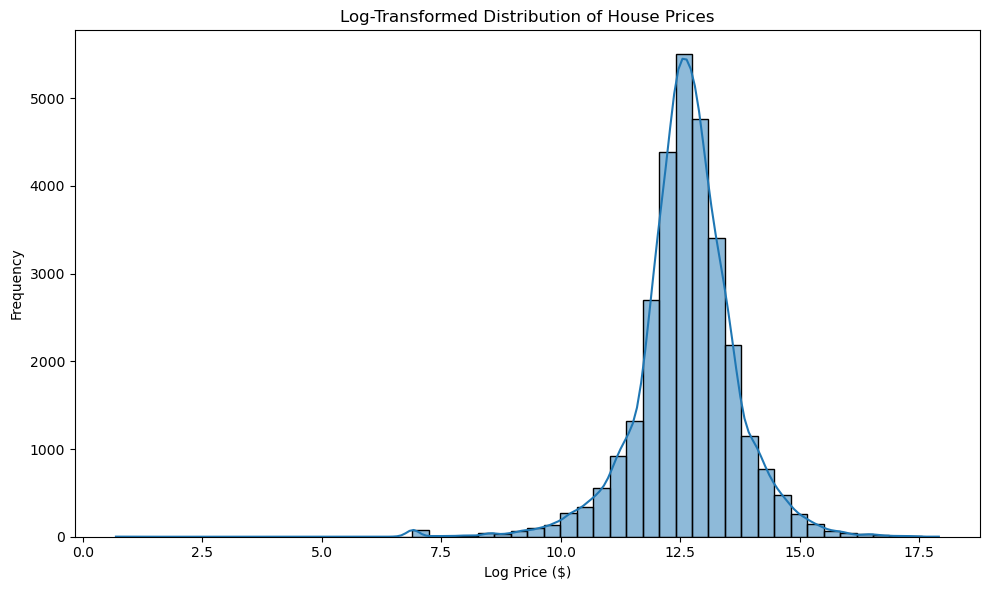

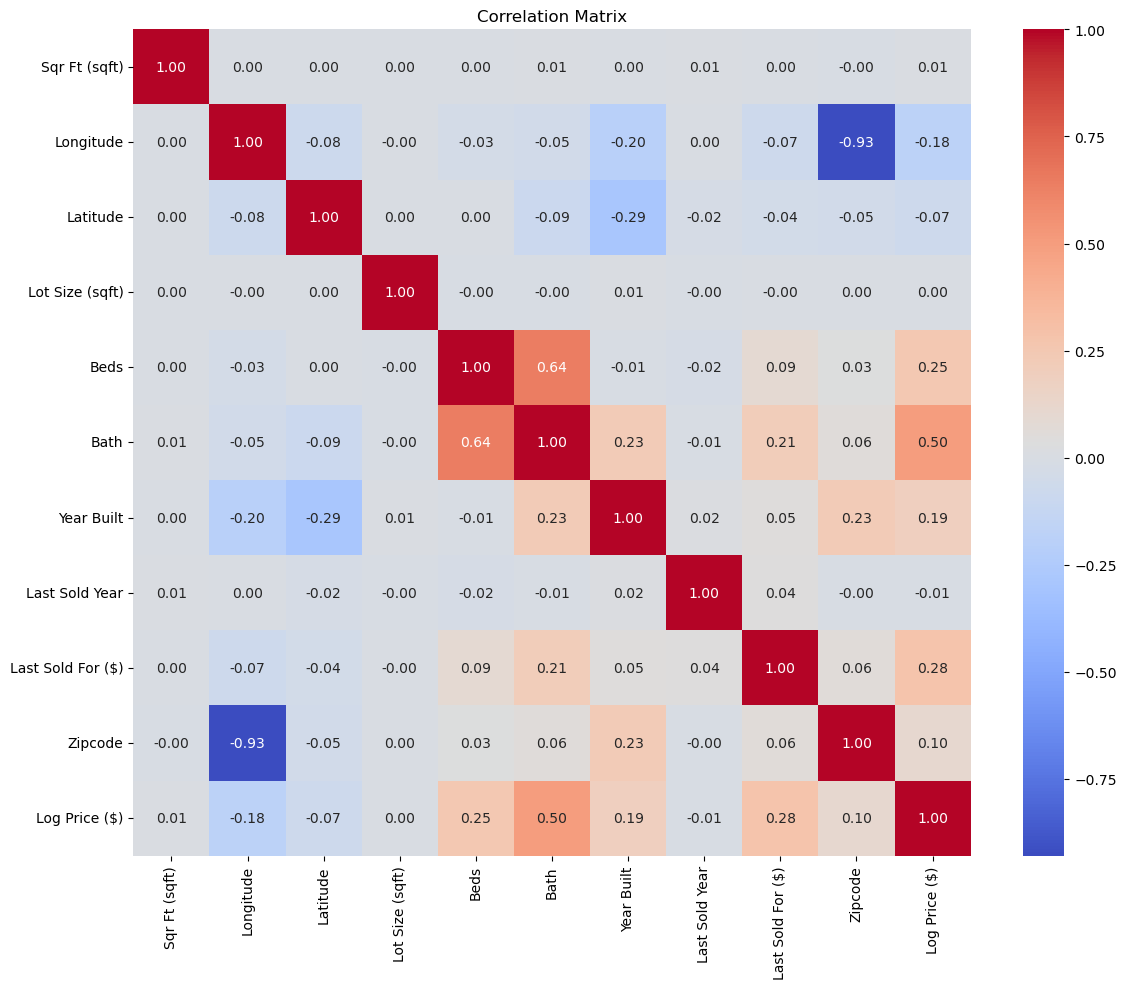

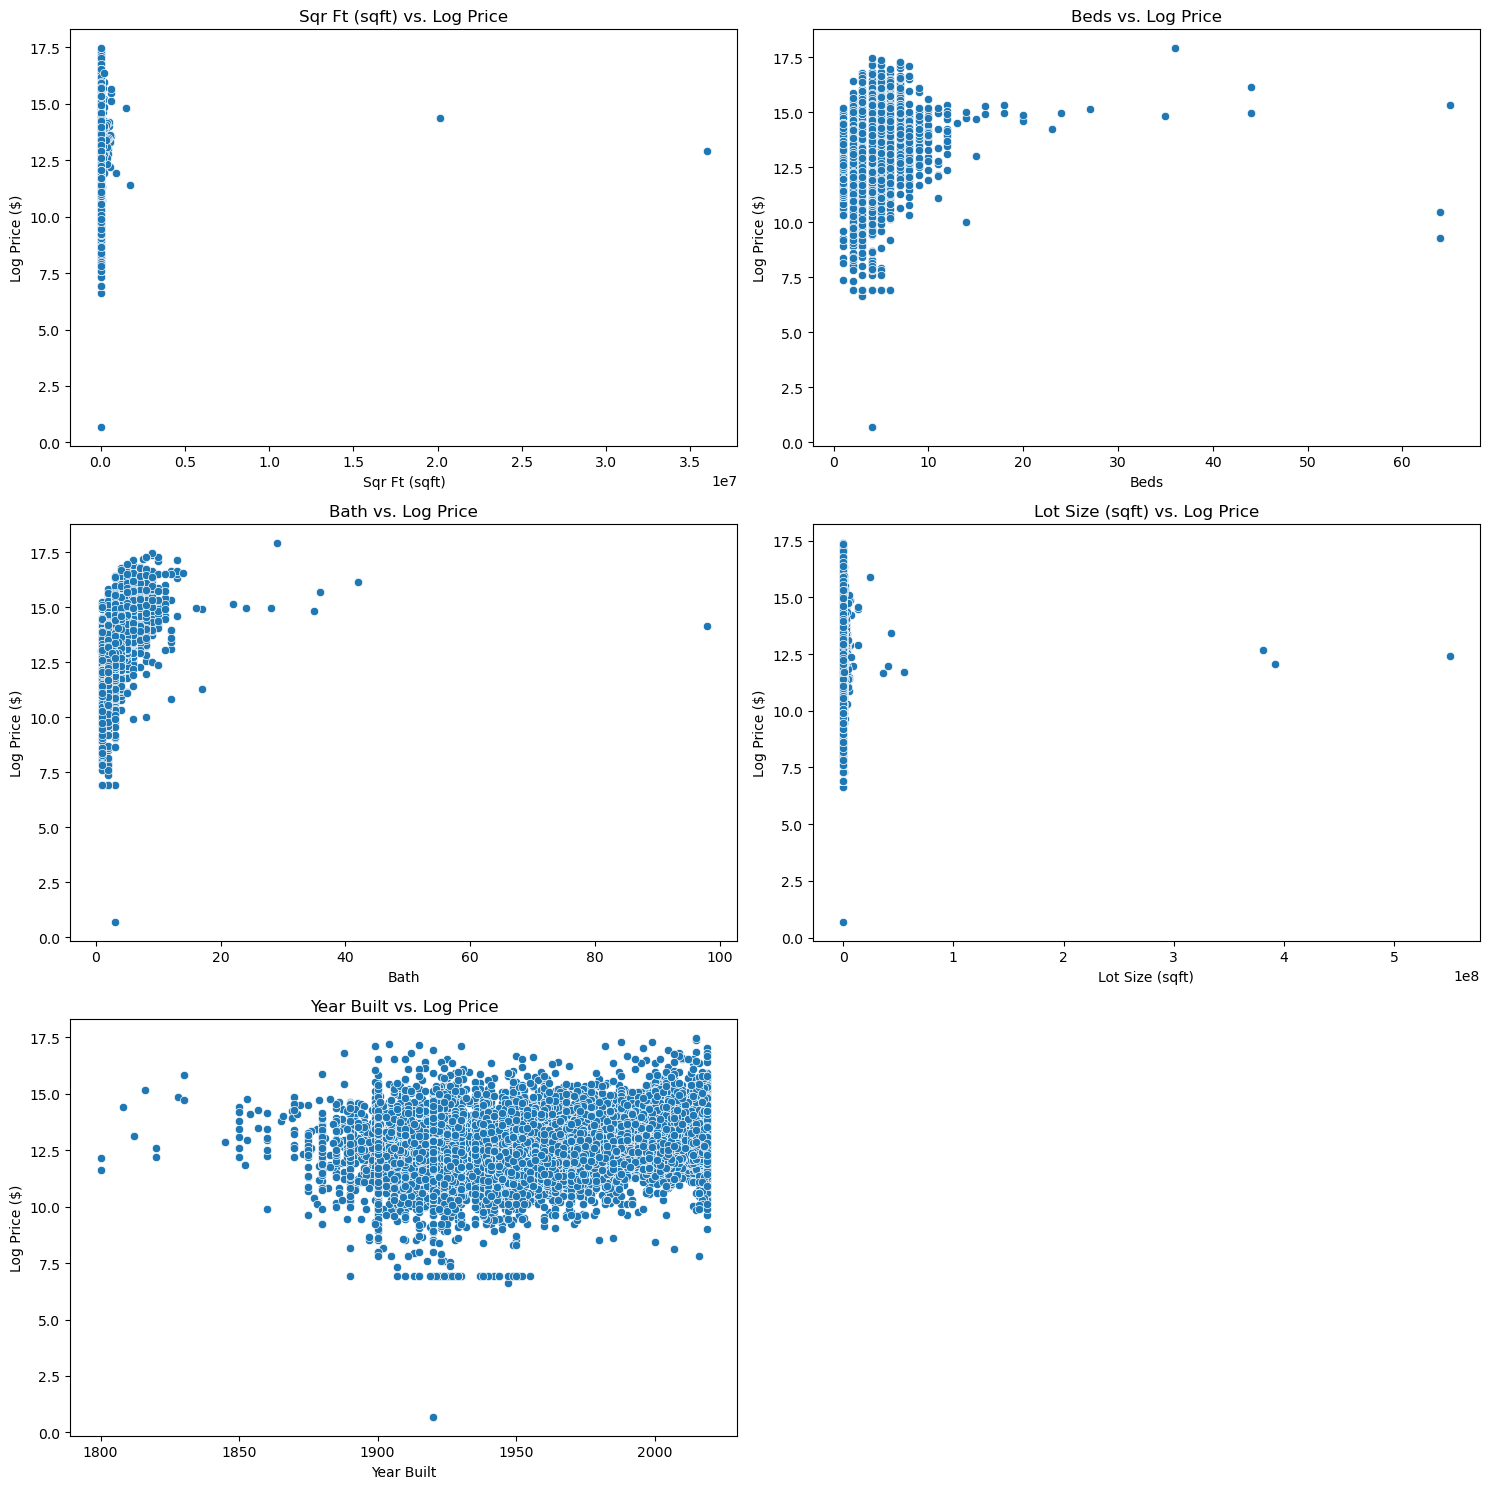

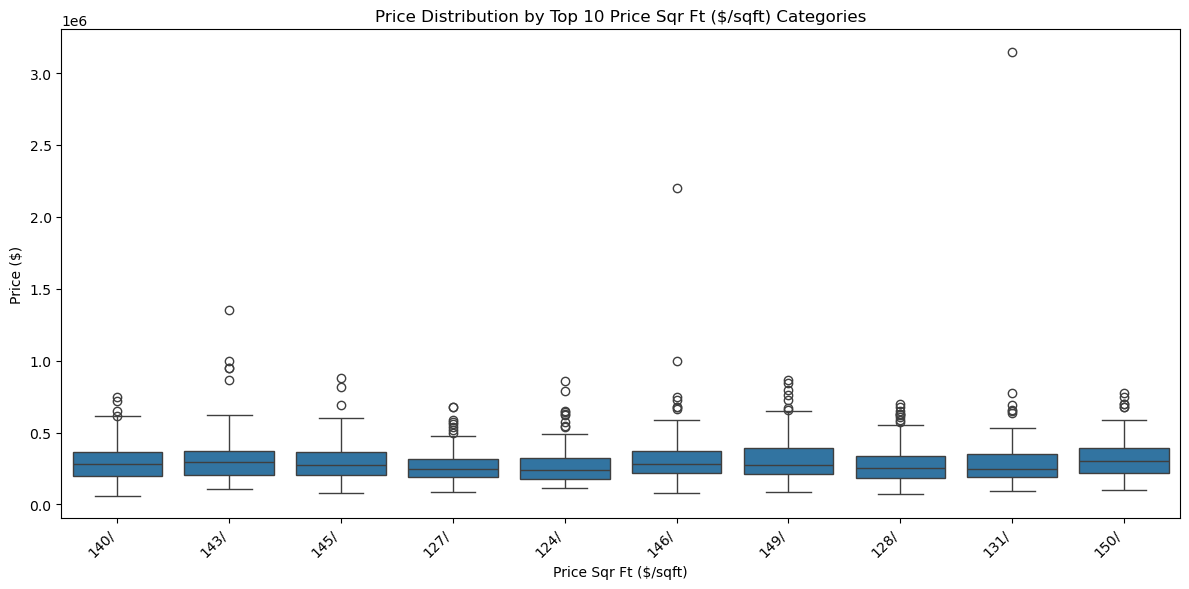

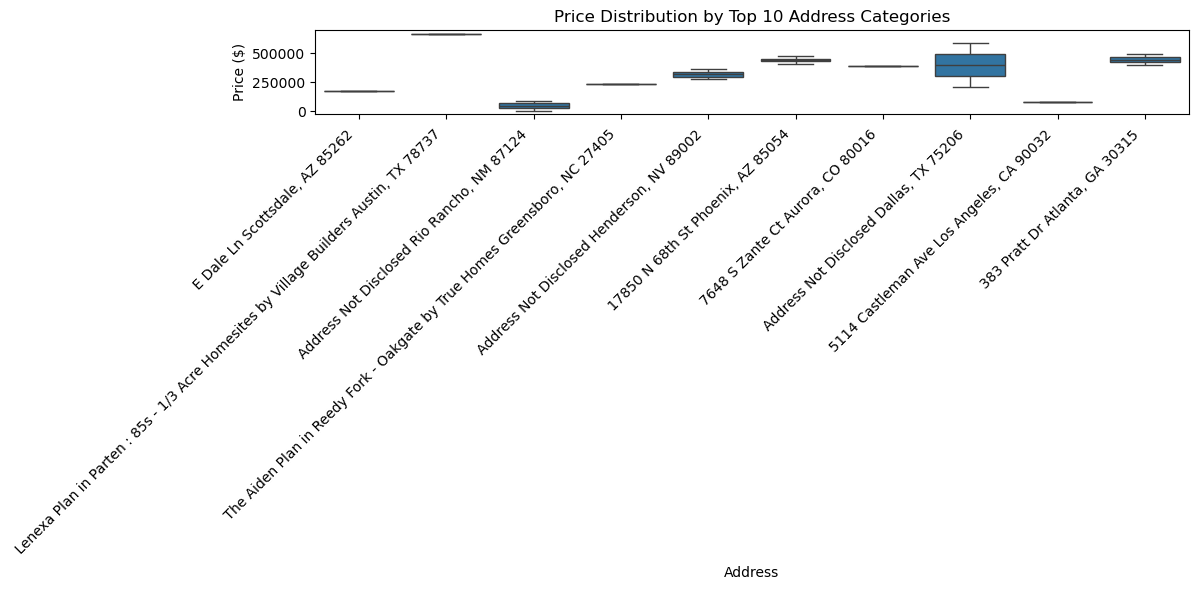

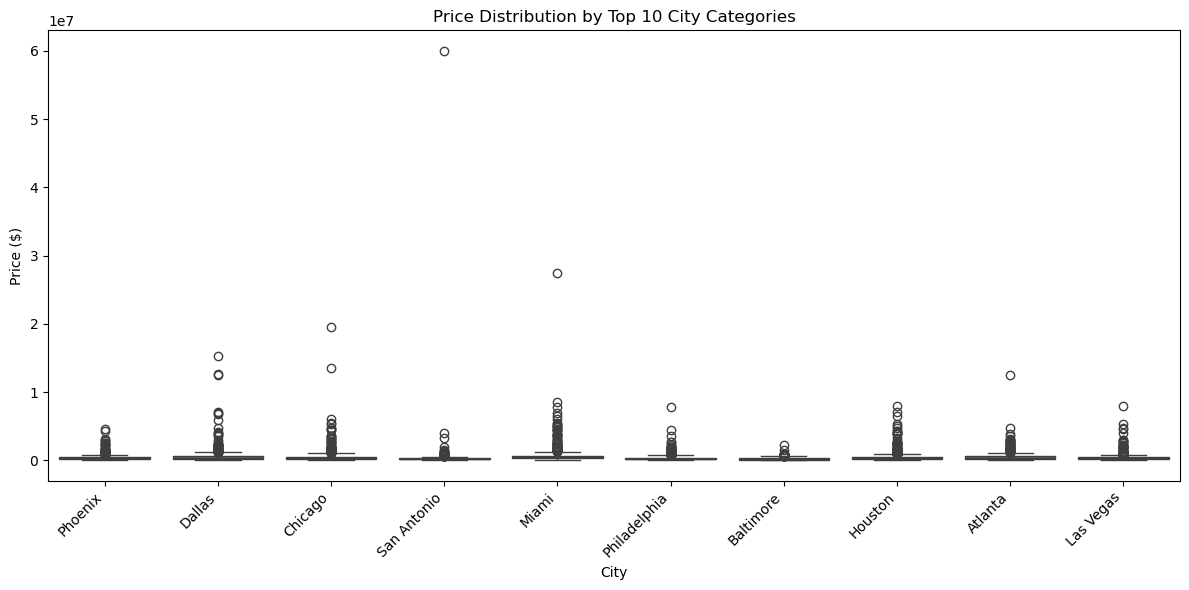

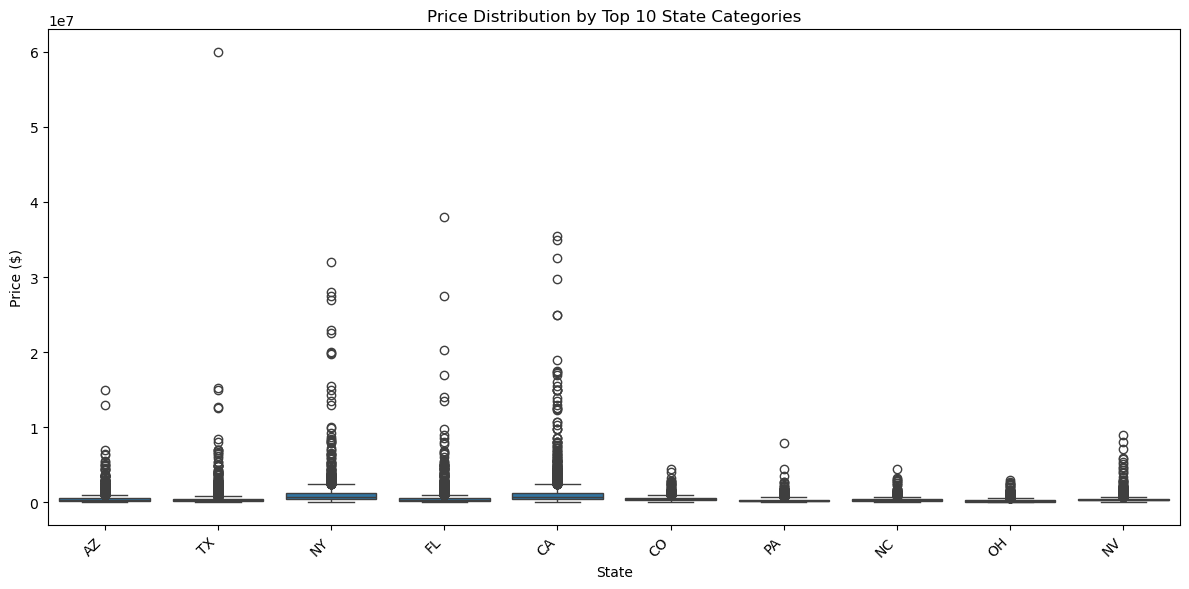

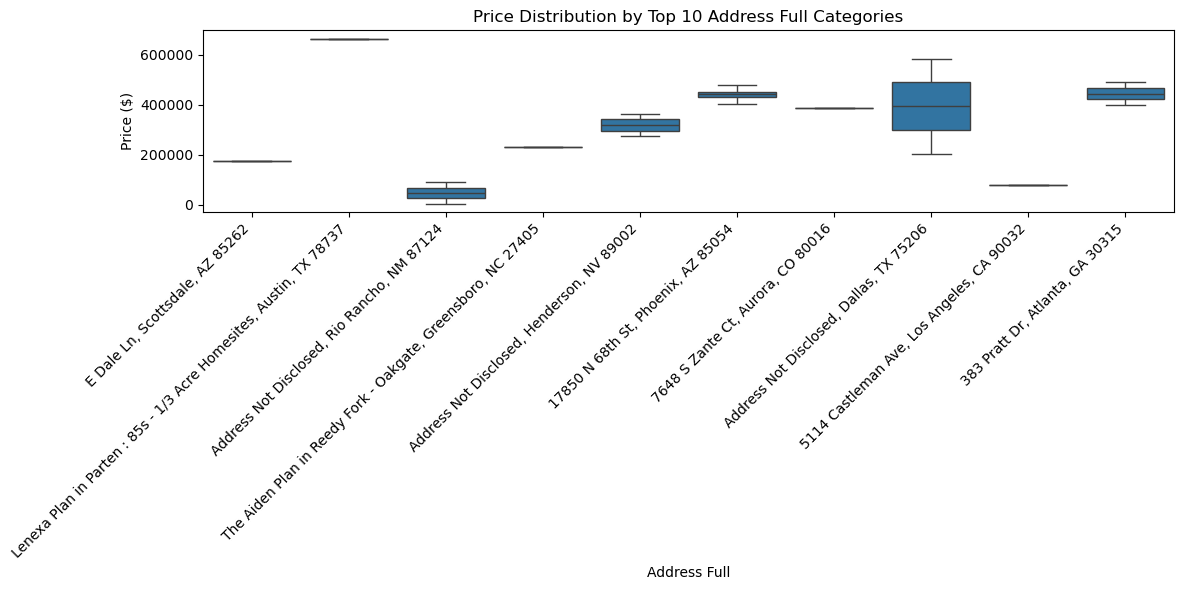

C:\Users\22837352\AppData\Local\Temp\ipykernel_42068\3647140369.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_capped['Log Price Sqr Ft'] = np.log1p(df_capped[col])


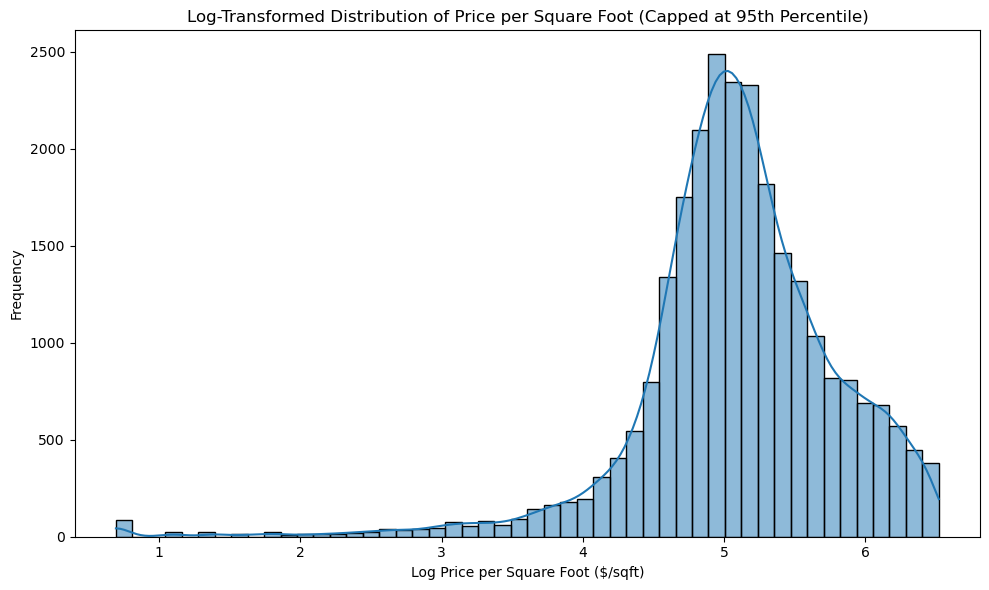

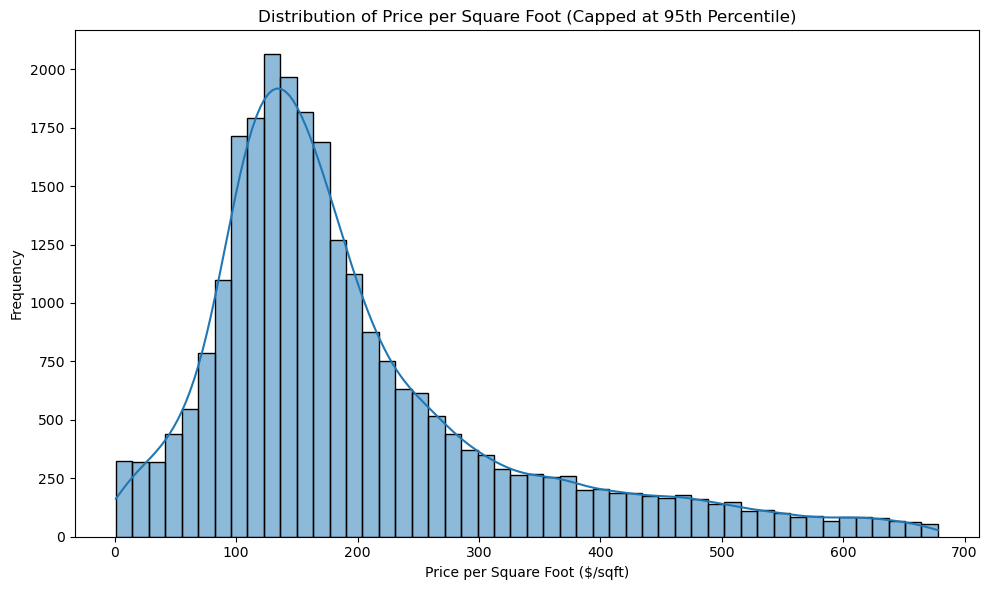

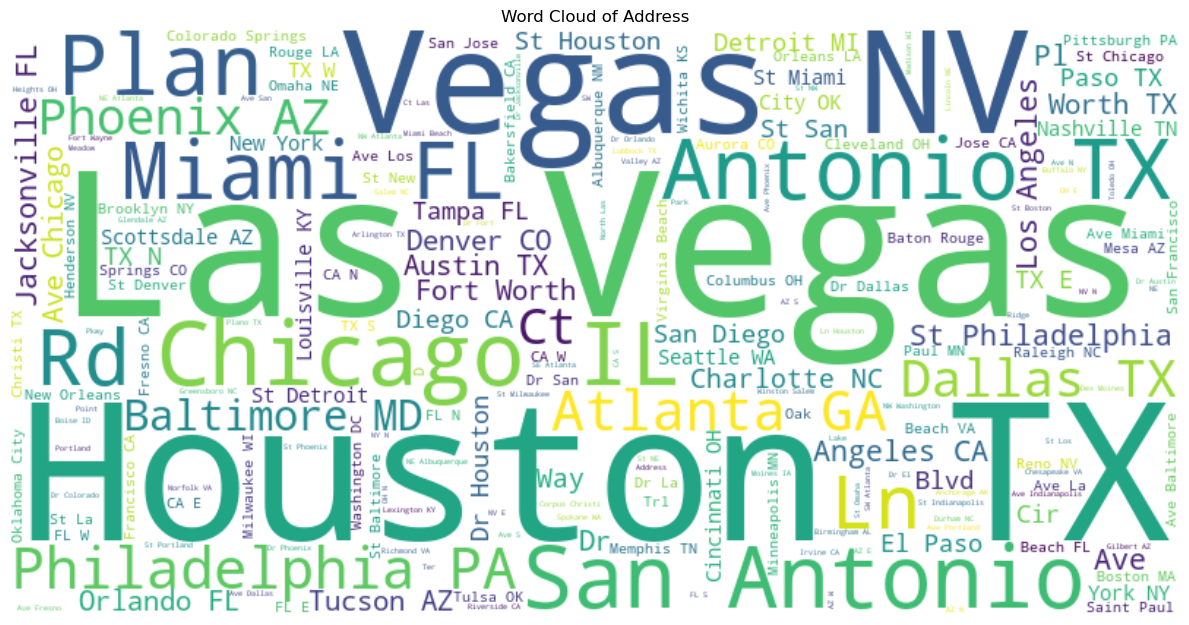

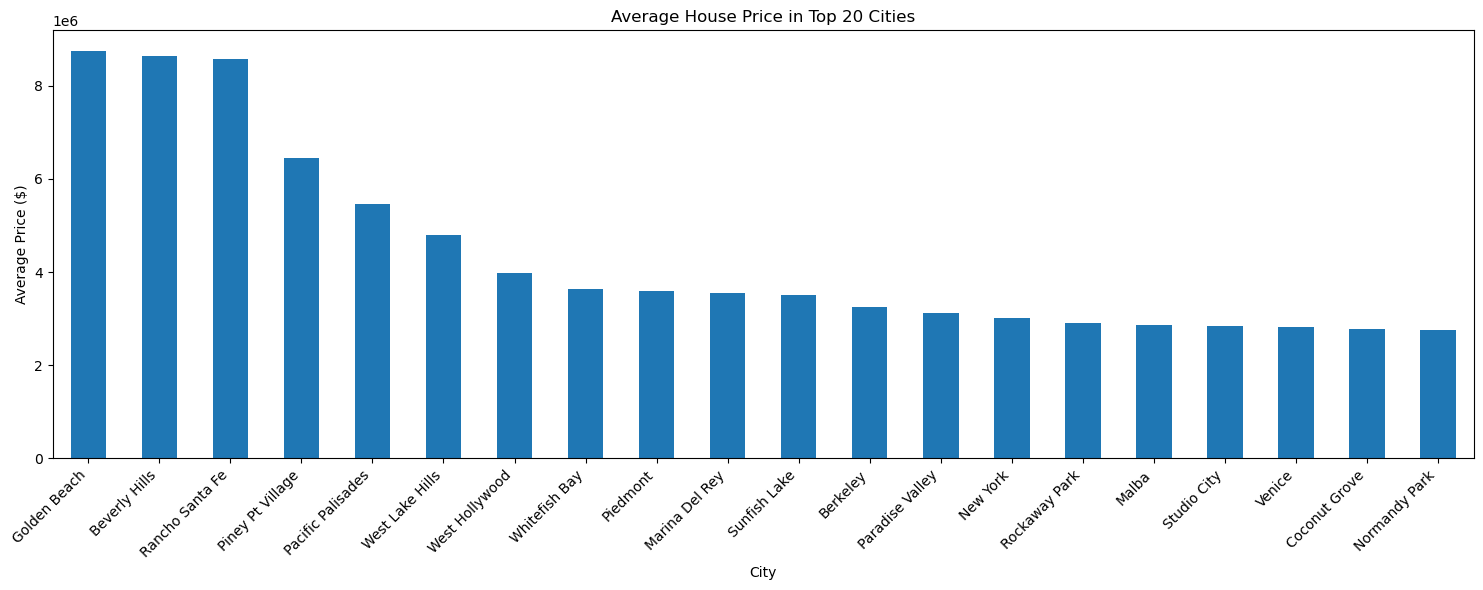

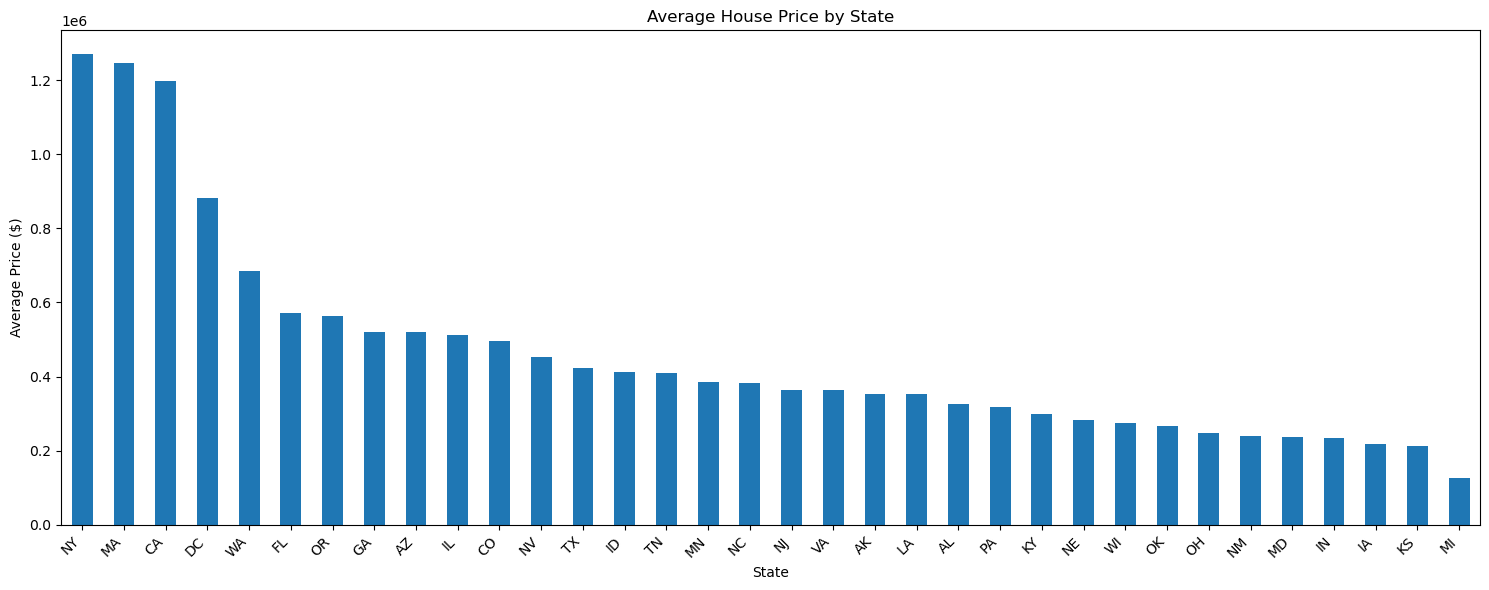

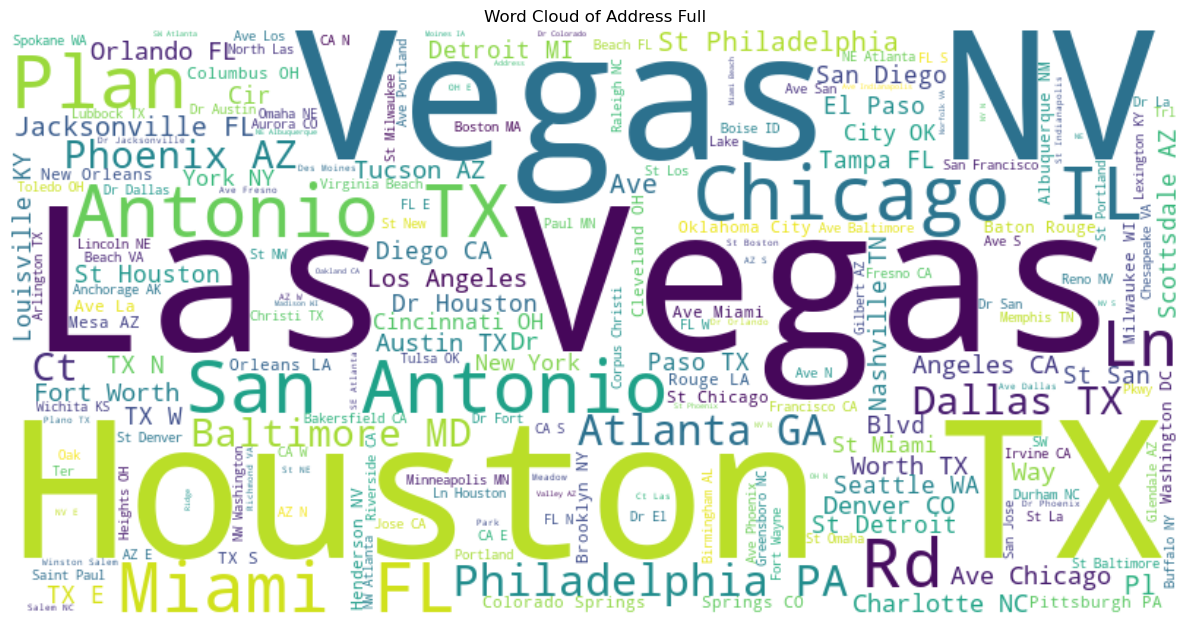

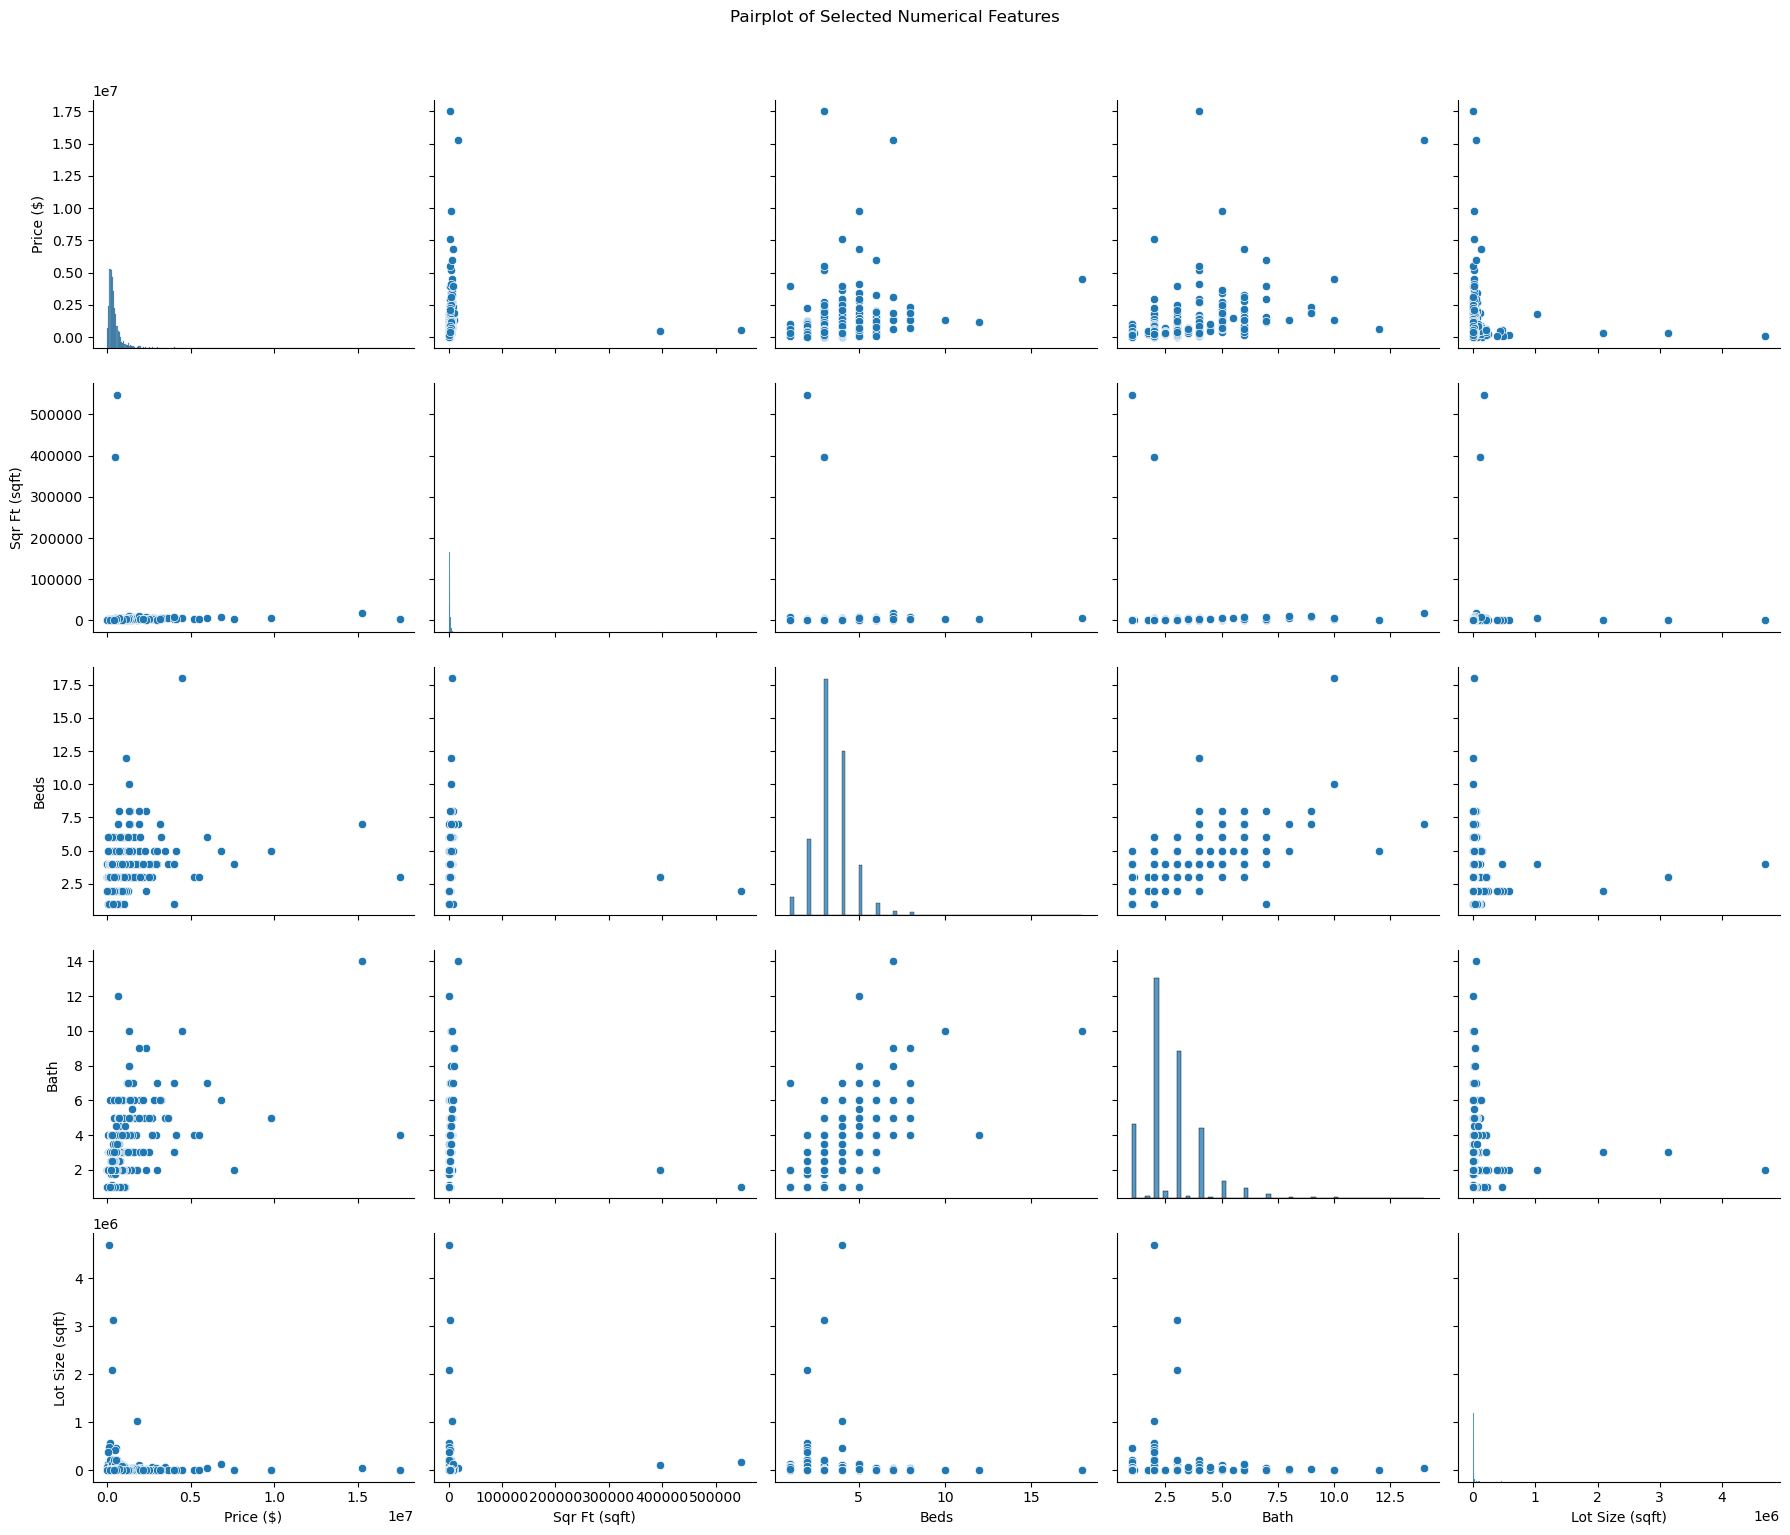

EDA completed successfully.
EDA process completed in 8.60 seconds.


In [2]:
# Advanced Exploratory Data Analysis with AI assistance
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import os

# Optional: Set matplotlib backend to 'Agg' for environments without a display
# import matplotlib
# matplotlib.use('Agg')

def perform_eda(df):
    """
    Perform exploratory data analysis.
    """
    # Check if 'Price ($)' column exists
    if 'Price ($)' not in df.columns:
        print("Error: 'Price ($)' column not found in the dataframe.")
        return

    # Convert 'Price ($)' to numeric, handling 'Contact For Estimate'
    df['Price ($)'] = pd.to_numeric(
        df['Price ($)'].replace('Contact For Estimate', np.nan),
        errors='coerce'
    )

    # Apply log transformation to the prices
    df['Log Price ($)'] = np.log1p(df['Price ($)'])

    # Plot distribution of the log-transformed target variable
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Log Price ($)'].dropna(), bins=50, kde=True)
    plt.title('Log-Transformed Distribution of House Prices')
    plt.xlabel('Log Price ($)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    plt.close()

    # Ensure that key features are numeric
    features = ['Sqr Ft (sqft)', 'Beds', 'Bath', 'Lot Size (sqft)', 'Year Built']
    for feature in features:
        if feature in df.columns:
            if feature == 'Lot Size (sqft)':
                # Convert 'Lot Size (sqft)' values to numeric, handling 'acres'
                def convert_lot_size(value):
                    if isinstance(value, str):
                        value = value.lower().strip()
                        if 'acres' in value:
                            try:
                                acres = float(value.replace('acres', '').strip())
                                return acres * 43560  # Convert acres to sqft
                            except ValueError:
                                return np.nan
                        else:
                            # Remove commas and convert to float
                            try:
                                return float(value.replace(',', ''))
                            except ValueError:
                                return np.nan
                    else:
                        return value

                df['Lot Size (sqft)'] = df['Lot Size (sqft)'].apply(convert_lot_size)
                df['Lot Size (sqft)'] = pd.to_numeric(df['Lot Size (sqft)'], errors='coerce')
            else:
                df[feature] = pd.to_numeric(df[feature], errors='coerce')

    # Correlation matrix for numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if 'Price ($)' in numeric_cols:
        numeric_cols = numeric_cols.drop('Price ($)')
    plt.figure(figsize=(12, 10))
    corr_matrix = df[numeric_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()
    plt.close()

    # Scatter plots for key features vs. Log Price
    num_features = len(features)
    cols = 2
    rows = (num_features + 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()
    for idx, feature in enumerate(features):
        if feature in df.columns:
            sns.scatterplot(
                data=df.dropna(subset=[feature, 'Log Price ($)']),
                x=feature,
                y='Log Price ($)',
                ax=axes[idx]
            )
            axes[idx].set_title(f'{feature} vs. Log Price')
            axes[idx].set_xlabel(feature)
            axes[idx].set_ylabel('Log Price ($)')
        else:
            print(f"Warning: '{feature}' column not found in the dataframe.")
            axes[idx].axis('off')
    # Remove any unused subplots
    for idx in range(num_features, len(axes)):
        fig.delaxes(axes[idx])
    plt.tight_layout()
    plt.show()
    plt.close()

    # Alternative for categorical variables with many categories
    categorical_cols = df.select_dtypes(include=['object']).columns
    categorical_cols = [col for col in categorical_cols if col != 'Price ($)']

    if categorical_cols:
        for col in categorical_cols:
            # Get top 10 categories by frequency
            top_categories = df[col].value_counts().nlargest(10).index

            # Filter dataframe for top categories
            df_top = df[df[col].isin(top_categories)]

            plt.figure(figsize=(12, 6))
            sns.boxplot(x=col, y='Price ($)', data=df_top)
            plt.title(f'Price Distribution by Top 10 {col} Categories')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
            plt.close()
    else:
        print("No categorical variables found for box plots.")

    # Handle high-cardinality categorical variables
    high_cardinality_cols = ['Price Sqr Ft ($/sqft)', 'Address', 'City', 'State', 'Address Full']
    for col in high_cardinality_cols:
        if col in df.columns:
            if col == 'Price Sqr Ft ($/sqft)':
                # Clean the data by removing trailing '/'
                df[col] = df[col].astype(str).str.replace('/', '', regex=False)
                # Convert to numeric
                df[col] = pd.to_numeric(df[col], errors='coerce')
                # Drop NaN values and filter out non-positive values
                df_clean = df.dropna(subset=[col]).copy()
                df_clean = df_clean[df_clean[col] > 0]

                if not df_clean.empty:
                    # Option 1: Cap outliers at the 95th percentile
                    price_cap = df_clean[col].quantile(0.95)
                    df_capped = df_clean[df_clean[col] <= price_cap]

                    # Option 2: Apply logarithmic transformation to the capped data
                    df_capped['Log Price Sqr Ft'] = np.log1p(df_capped[col])

                    # Plot the log-transformed, capped distribution
                    plt.figure(figsize=(10, 6))
                    sns.histplot(df_capped['Log Price Sqr Ft'], bins=50, kde=True)
                    plt.title('Log-Transformed Distribution of Price per Square Foot (Capped at 95th Percentile)')
                    plt.xlabel('Log Price per Square Foot ($/sqft)')
                    plt.ylabel('Frequency')
                    plt.tight_layout()
                    plt.show()
                    plt.close()

                    # Alternatively, if you want to plot the capped data without log transformation:
                    plt.figure(figsize=(10, 6))
                    sns.histplot(df_capped[col], bins=50, kde=True)
                    plt.title('Distribution of Price per Square Foot (Capped at 95th Percentile)')
                    plt.xlabel('Price per Square Foot ($/sqft)')
                    plt.ylabel('Frequency')
                    plt.tight_layout()
                    plt.show()
                    plt.close()
                else:
                    print("No valid data to plot for 'Price Sqr Ft ($/sqft)'.")
            elif col == 'State':
                plt.figure(figsize=(15, 6))
                state_avg_price = df.groupby('State')['Price ($)'].mean().sort_values(ascending=False)
                state_avg_price.plot(kind='bar')
                plt.title('Average House Price by State')
                plt.xlabel('State')
                plt.ylabel('Average Price ($)')
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()
                plt.close()
            elif col == 'City':
                plt.figure(figsize=(15, 6))
                city_avg_price = df.groupby('City')['Price ($)'].mean().nlargest(20)
                city_avg_price.plot(kind='bar')
                plt.title('Average House Price in Top 20 Cities')
                plt.xlabel('City')
                plt.ylabel('Average Price ($)')
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()
                plt.close()
            elif col in ['Address', 'Address Full']:
                # Check if WordCloud is available
                try:
                    from wordcloud import WordCloud
                    plt.figure(figsize=(12, 8))
                    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df[col].dropna()))
                    plt.imshow(wordcloud, interpolation='bilinear')
                    plt.axis('off')
                    plt.title(f'Word Cloud of {col}')
                    plt.tight_layout()
                    plt.show()
                    plt.close()
                except ImportError:
                    # Alternative visualization: Top 20 most common words
                    words = ' '.join(df[col].dropna()).split()
                    word_counts = Counter(words).most_common(20)

                    plt.figure(figsize=(12, 6))
                    sns.barplot(x=[word for word, _ in word_counts], y=[count for _, count in word_counts])
                    plt.title(f'Top 20 Most Common Words in {col}')
                    plt.xlabel('Words')
                    plt.ylabel('Count')
                    plt.xticks(rotation=45, ha='right')
                    plt.tight_layout()
                    plt.show()
                    plt.close()
            else:
                print(f"Skipping visualization for '{col}' due to high number of categories.")
        else:
            print(f"Skipping visualization for '{col}' as it is not in the dataframe.")

    # Pairplot for numerical features (sample data if necessary)
    selected_numeric_cols = ['Price ($)', 'Sqr Ft (sqft)', 'Beds', 'Bath', 'Lot Size (sqft)']
    available_numeric_cols = [col for col in selected_numeric_cols if col in df.columns]

    if len(available_numeric_cols) >= 2:
        # Sample data if too large
        df_numeric = df[available_numeric_cols].dropna()
        if df_numeric.shape[0] > 1000:
            df_sampled = df_numeric.sample(1000, random_state=42)
        else:
            df_sampled = df_numeric
        sns.pairplot(df_sampled, height=3, aspect=1.2)
        plt.suptitle("Pairplot of Selected Numerical Features", y=1.02)
        plt.tight_layout()
        plt.show()
        plt.close()

# Main execution
if __name__ == "__main__":
    # Define the full path to the cleaned CSV file
    file_path = r"G:\Uni\2nd year\Intro to AI\Regression\assignment-1-ryantigi254\Regression\Weekly Tasks\cleaned_data.csv"

    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"Error: The file '{file_path}' does not exist.")
    else:
        try:
            # Load the data from the cleaned CSV file
            df = pd.read_csv(file_path)

            # Check if the DataFrame is not empty
            if df.empty:
                print("Error: The dataframe is empty. Unable to perform EDA.")
            else:
                print(f"Data loaded successfully. Shape: {df.shape}")

                # Perform EDA
                start_time = time.time()
                try:
                    perform_eda(df)
                    print("EDA completed successfully.")
                except Exception as e:
                    print(f"An error occurred during EDA: {str(e)}")
                end_time = time.time()
                execution_time = end_time - start_time
                print(f"EDA process completed in {execution_time:.2f} seconds.")
                plt.close('all')
        except Exception as e:
            print(f"An error occurred while loading the file: {str(e)}")


##### Model Price Prediction and Handling Heteroscedasticity

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from scipy import stats, special
import matplotlib.pyplot as plt
import seaborn as sns

# Function to convert lot size from acres to square feet
def convert_lot_size(value):
    """
    Convert 'Lot Size (sqft)' from acres to sqft if applicable.

    Parameters:
    value: The value to convert.

    Returns:
    float: The converted lot size in sqft, or NaN if conversion fails.
    """
    try:
        if pd.isna(value):
            return np.nan
        value_str = str(value).strip().lower()
        if 'acres' in value_str:
            # Extract the numeric part and convert acres to sqft
            number = float(value_str.replace('acres', '').strip())
            return number * 43560
        else:
            # Remove commas and convert to float
            return float(value_str.replace(',', ''))
    except (ValueError, TypeError):
        return np.nan

# Function to model house price prediction and handle heteroscedasticity
def model_price_prediction(df):
    """
    Model the data to predict house prices, addressing heteroscedasticity creatively.

    Parameters:
    df: pandas DataFrame containing the relevant columns.

    Returns:
    pandas DataFrame: The original DataFrame with predicted prices added.
    """
    # Ensure required columns are present
    required_cols = ['Sqr Ft (sqft)', 'Beds', 'Bath', 'Lot Size (sqft)', 'Year Built', 'Price ($)']
    for col in required_cols:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' not found in the DataFrame.")

    # Data Cleaning
    # Clean 'Lot Size (sqft)' column
    df['Lot Size (sqft)'] = df['Lot Size (sqft)'].apply(convert_lot_size)
    # Convert to numeric
    df['Lot Size (sqft)'] = pd.to_numeric(df['Lot Size (sqft)'], errors='coerce')

    # Ensure other numeric columns are numeric
    numeric_cols = ['Sqr Ft (sqft)', 'Beds', 'Bath', 'Year Built', 'Price ($)']
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Drop rows with missing values in required columns
    df = df.dropna(subset=required_cols)

    # Prepare features and target variable
    X = df[['Sqr Ft (sqft)', 'Beds', 'Bath', 'Lot Size (sqft)', 'Year Built']].copy()
    y = df['Price ($)'].copy()

    # Feature Engineering
    # Add interaction and polynomial terms to enhance the model
    X.loc[:, 'Beds_Bath'] = X['Beds'] * X['Bath']
    X.loc[:, 'Sqr Ft^2'] = X['Sqr Ft (sqft)'] ** 2
    X.loc[:, 'Age'] = 2023 - X['Year Built']

    # Log-transform skewed features (ensure values are positive)
    X.loc[:, 'Lot Size (sqft)'] = X['Lot Size (sqft)'].apply(lambda x: np.log1p(x) if x > 0 else 0)
    X.loc[:, 'Sqr Ft (sqft)'] = X['Sqr Ft (sqft)'].apply(lambda x: np.log1p(x) if x > 0 else 0)

    # Add constant term for intercept in the regression model
    X_const = sm.add_constant(X)

    # Fit initial OLS model
    model = sm.OLS(y, X_const).fit()

    # Visual diagnostics: Plot residuals vs fitted values to check for patterns
    plt.figure(figsize=(8, 6))
    sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs. Fitted Values')
    plt.show()

    # Perform Breusch-Pagan test to check for heteroscedasticity
    bp_test = het_breuschpagan(model.resid, model.model.exog)
    bp_pvalue = bp_test[3]

    # Perform White test to further check for heteroscedasticity
    white_test = het_white(model.resid, model.model.exog)
    white_pvalue = white_test[3]

    print(f"Breusch-Pagan p-value: {bp_pvalue}")
    print(f"White test p-value: {white_pvalue}")

    used_transformation = False  # Flag to indicate if transformation was used

    # Check for heteroscedasticity using p-values
    if bp_pvalue < 0.05 or (white_pvalue is not None and white_pvalue < 0.05):
        print("Heteroscedasticity detected. Applying transformations and robust methods.")

        # Attempt Box-Cox transformation on target if all values are positive
        if (y <= 0).any():
            print("Cannot apply Box-Cox transformation due to non-positive target values.")
            y_transformed = np.log1p(y)
            transformation = 'Log'
        else:
            y_transformed, lambda_opt = stats.boxcox(y)
            print(f"Applied Box-Cox transformation with lambda: {lambda_opt}")
            transformation = 'Box-Cox'

        # Refit the model with transformed target
        model_transformed = sm.OLS(y_transformed, X_const).fit()

        # Re-test for heteroscedasticity after transformation
        bp_test_transformed = het_breuschpagan(model_transformed.resid, model_transformed.model.exog)
        bp_pvalue_transformed = bp_test_transformed[3]
        white_test_transformed = het_white(model_transformed.resid, model_transformed.model.exog)
        white_pvalue_transformed = white_test_transformed[3]

        print(f"After {transformation} transformation:")
        print(f"Breusch-Pagan p-value: {bp_pvalue_transformed}")
        print(f"White test p-value: {white_pvalue_transformed}")

        if bp_pvalue_transformed >= 0.05 and (white_pvalue_transformed is None or white_pvalue_transformed >= 0.05):
            print("Heteroscedasticity resolved after transformation.")
            used_transformation = True  # Transformation was effective
            # Update the DataFrame with transformed target
            df['Transformed Price'] = y_transformed
            final_model = model_transformed
        else:
            print("Heteroscedasticity persists. Using Weighted Least Squares.")
            used_transformation = False  # Final model uses untransformed target
            # Calculate weights as inverse of absolute residuals
            weights = 1 / np.abs(model.resid)
            model_wls = sm.WLS(y, X_const, weights=weights).fit()
            final_model = model_wls
    else:
        print("No significant heteroscedasticity detected.")
        final_model = model

    # Display model summary for interpretation
    print(final_model.summary())

    # Predict and evaluate the model
    predictions = final_model.predict(X_const)

    # Only invert transformation if it was used in the final model
    if used_transformation:
        if transformation == 'Log':
            predictions = np.expm1(predictions)
        elif transformation == 'Box-Cox':
            # Inverse Box-Cox transformation
            predictions = special.inv_boxcox(predictions, lambda_opt)

    # Check for NaNs in predictions and handle them
    if np.isnan(predictions).any():
        print("Warning: Predictions contain NaN values. These will be dropped for evaluation.")
        # Remove NaNs from predictions and corresponding y values
        valid_idx = ~np.isnan(predictions)
        predictions = predictions[valid_idx]
        y = y.iloc[valid_idx]
    else:
        valid_idx = slice(None)  # All indices are valid

    # Calculate evaluation metrics for model performance
    from sklearn.metrics import mean_squared_error, r2_score
    mse = mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)
    print(f"\nModel Evaluation:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Update the DataFrame with predictions
    df.loc[df.index[valid_idx], 'Predicted Price'] = predictions

    return df

# Apply the function to your DataFrame
if not df.empty:
    df = model_price_prediction(df)


##### Split Data into Training and Testing Sets


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np
import pandas as pd
import os

# Load the data
df = pd.read_csv(r'G:\Uni\2nd year\Intro to AI\Regression\assignment-1-ryantigi254\Regression\Weekly Tasks\cleaned_data.csv')

# Advanced Data Splitting Function
def split_data(df):
    """
    Split the data into training and testing sets using stratified sampling
    and perform feature engineering before splitting.
    """
    # Ensure required columns are present
    required_cols = ['Sqr Ft (sqft)', 'Beds', 'Bath', 'Lot Size (sqft)', 'Year Built', 'Price ($)']
    for col in required_cols:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' not found in the DataFrame.")

    # Feature Engineering
    df = df.copy()
    df['Age'] = 2023 - df['Year Built']
    df['Beds_Bath'] = df['Beds'] * df['Bath']
    df['Sqr Ft^2'] = df['Sqr Ft (sqft)'] ** 2

    # Select features and target
    features = ['Sqr Ft (sqft)', 'Beds', 'Bath', 'Lot Size (sqft)', 'Age', 'Beds_Bath', 'Sqr Ft^2']
    X = df[features].copy()  # Create a copy to avoid SettingWithCopyWarning
    y = df['Price ($)'].copy()

    # Convert columns to numeric, coercing errors to NaN
    for col in X.columns:
        X.loc[:, col] = pd.to_numeric(X[col], errors='coerce')
    y = pd.to_numeric(y, errors='coerce')

    # Handle missing values
    X = X.fillna(X.median())
    y = y.fillna(y.median())

    # Apply log transformation to skewed features
    X.loc[:, 'Lot Size (sqft)'] = X['Lot Size (sqft)'].apply(lambda x: np.log1p(x) if x > 0 else 0)
    X.loc[:, 'Sqr Ft (sqft)'] = X['Sqr Ft (sqft)'].apply(lambda x: np.log1p(x) if x > 0 else 0)
    y = np.log1p(y)  # Log-transform the target variable

    # Stratify based on the target variable
    discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
    y_binned = discretizer.fit_transform(y.values.reshape(-1, 1)).reshape(-1)

    # Split into training and testing sets with stratification
    X_train, X_test, y_train_log, y_test_log = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y_binned
    )

    # Inverse transform the target variable for actual values
    y_train = np.expm1(y_train_log)
    y_test = np.expm1(y_test_log)

    print("Data split using stratified sampling based on binned log-transformed target variable.")
    return X_train, X_test, y_train, y_test

# Check if the DataFrame is empty
if not df.empty:
    X_train, X_test, y_train, y_test = split_data(df)

    # Create directories for train and test data
    os.makedirs('train', exist_ok=True)
    os.makedirs('test', exist_ok=True)

    # Save train data
    pd.concat([X_train, pd.Series(y_train, name='Price ($)')], axis=1).to_csv('train/train_data.csv', index=False)

    # Save test data
    pd.concat([X_test, pd.Series(y_test, name='Price ($)')], axis=1).to_csv('test/test_data.csv', index=False)

    print("Train and test data saved to separate folders.")
else:
    print("DataFrame is empty. Please check your data source.")


##### Model Building


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
import json
import sys

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from joblib import dump, parallel_backend

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Load train and test data
train_data_path = r"G:\Uni\2nd year\Intro to AI\Regression\assignment-1-ryantigi254\Regression\Weekly Tasks\train\train_data.csv"
test_data_path = r"G:\Uni\2nd year\Intro to AI\Regression\assignment-1-ryantigi254\Regression\Weekly Tasks\test\test_data.csv"

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

# Separate features and target variable
X_train = train_data.drop('Price ($)', axis=1)
y_train = train_data['Price ($)']
X_test = test_data.drop('Price ($)', axis=1)
y_test = test_data['Price ($)']

# Check for GPU availability
def check_gpu():
    gpu_available = False
    xgboost_gpu = False
    cuml_available = False
    try:
        import cupy
        _ = cupy.array([0])
        print("CuPy is available. GPU is available.")
        gpu_available = True
    except ImportError:
        print("CuPy is not installed. GPU computations may not be available for all models.")

    try:
        import xgboost as xgb
        params = {'tree_method': 'gpu_hist', 'objective': 'reg:squarederror'}
        dmatrix = xgb.DMatrix(np.random.rand(100, 10), label=np.random.rand(100))
        xgb.cv(params, dmatrix, num_boost_round=1, nfold=2)
        print("XGBoost GPU is available.")
        xgboost_gpu = True
    except Exception as e:
        print("XGBoost GPU is not available or not configured properly.")
        xgboost_gpu = False

    try:
        import cuml
        from cuml.svm import SVR as cuSVR
        print("cuML is available. GPU-accelerated SVR can be used.")
        cuml_available = True
    except ImportError:
        print("cuML is not installed. GPU-accelerated SVR will not be available.")
        cuml_available = False

    return gpu_available, xgboost_gpu, cuml_available

gpu_available, xgboost_gpu, cuml_available = check_gpu()

def build_models(X_train, y_train):
    """
    Build and evaluate various regression models with hyperparameter tuning and cross-validation.
    """
    models = {}

    # Simple Linear Regression (using 'Sqr Ft (sqft)' only)
    lr_simple = LinearRegression()
    lr_simple.fit(X_train[['Sqr Ft (sqft)']], y_train)
    models['Simple Linear Regression'] = lr_simple

    # Multiple Linear Regression
    lr_multi = LinearRegression()
    lr_multi.fit(X_train, y_train)
    models['Multiple Linear Regression'] = lr_multi

    # Use threading backend to allow n_jobs > 1 without multiprocessing issues
    with parallel_backend('threading'):
        # Ridge Regression with cross-validation
        ridge_params = {'alpha': [0.01, 0.1, 1.0, 10, 100]}
        ridge = Ridge()
        ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        ridge_cv.fit(X_train, y_train)
        models['Ridge Regression'] = ridge_cv.best_estimator_
        print(f"Best alpha for Ridge Regression: {ridge_cv.best_params_['alpha']}")

        # Lasso Regression with cross-validation
        lasso_params = {'alpha': [0.01, 0.1, 1.0, 10, 100]}
        lasso = Lasso(max_iter=10000)
        lasso_cv = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        lasso_cv.fit(X_train, y_train)
        models['Lasso Regression'] = lasso_cv.best_estimator_
        print(f"Best alpha for Lasso Regression: {lasso_cv.best_params_['alpha']}")

        # Elastic Net Regression with cross-validation
        enet_params = {'alpha': [0.01, 0.1, 1.0, 10], 'l1_ratio': [0.2, 0.5, 0.8]}
        elastic_net = ElasticNet(max_iter=10000)
        enet_cv = GridSearchCV(elastic_net, enet_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        enet_cv.fit(X_train, y_train)
        models['Elastic Net Regression'] = enet_cv.best_estimator_
        print(f"Best params for Elastic Net Regression: {enet_cv.best_params_}")

        # Polynomial Regression with Ridge regularization
        poly_params = {
            'poly_features__degree': [2, 3],
            'ridge__alpha': [0.01, 0.1, 1.0, 10]
        }
        poly_pipeline = Pipeline([
            ('poly_features', PolynomialFeatures(include_bias=False)),
            ('scaler', StandardScaler()),
            ('ridge', Ridge())
        ])
        poly_cv = GridSearchCV(poly_pipeline, poly_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        poly_cv.fit(X_train, y_train)
        models['Polynomial Ridge Regression'] = poly_cv.best_estimator_
        print(f"Best params for Polynomial Ridge Regression: {poly_cv.best_params_}")

        # Decision Tree Regression with hyperparameter tuning
        dt_params = {'max_depth': [3, 5, 7, 9, None]}
        dt_regressor = DecisionTreeRegressor(random_state=42)
        dt_cv = GridSearchCV(dt_regressor, dt_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        dt_cv.fit(X_train, y_train)
        models['Decision Tree Regression'] = dt_cv.best_estimator_
        print(f"Best max_depth for Decision Tree Regression: {dt_cv.best_params_['max_depth']}")

        # Random Forest Regression with hyperparameter tuning
        rf_params = {'n_estimators': [100, 200], 'max_depth': [5, 7, 9, None]}
        rf_regressor = RandomForestRegressor(random_state=42, n_jobs=-1)
        rf_cv = GridSearchCV(rf_regressor, rf_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
        rf_cv.fit(X_train, y_train)
        models['Random Forest Regression'] = rf_cv.best_estimator_
        print(f"Best params for Random Forest Regression: {rf_cv.best_params_}")

        # Gradient Boosting Regression with hyperparameter tuning
        gb_params = {
            'n_estimators': [100, 200],
            'learning_rate': [0.1, 0.05],
            'max_depth': [3, 5, 7]
        }
        gb_regressor = GradientBoostingRegressor(random_state=42)
        gb_cv = GridSearchCV(gb_regressor, gb_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
        gb_cv.fit(X_train, y_train)
        models['Gradient Boosting Regression'] = gb_cv.best_estimator_
        print(f"Best params for Gradient Boosting Regression: {gb_cv.best_params_}")

        # Support Vector Regression with hyperparameter tuning and scaling
        if cuml_available:
            # Use cuML's GPU-accelerated SVR
            from cuml.svm import SVR as cuSVR
            svr_params = {
                'C': [0.1, 1, 10],
                'kernel': ['linear', 'rbf'],
                'epsilon': [0.1, 0.2, 0.5]
            }
            best_score = float('inf')
            best_params = None
            for C in svr_params['C']:
                for kernel in svr_params['kernel']:
                    for epsilon in svr_params['epsilon']:
                        svr = cuSVR(C=C, kernel=kernel, epsilon=epsilon)
                        svr.fit(X_train.values.astype('float32'), y_train.values.astype('float32'))
                        y_pred = svr.predict(X_train.values.astype('float32'))
                        mse = np.mean((y_train.values - y_pred)**2)
                        if mse < best_score:
                            best_score = mse
                            best_params = {'C': C, 'kernel': kernel, 'epsilon': epsilon}
                            best_svr = svr
            models['Support Vector Regression'] = best_svr
            print(f"Best params for GPU-accelerated SVR: {best_params}")
        else:
            # Use scikit-learn's SVR with reduced parameter grid
            svr_params = {
                'svr__kernel': ['linear'],
                'svr__C': [1],
                'svr__epsilon': [0.1]
            }
            svr_pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('svr', SVR())
            ])
            svr_cv = GridSearchCV(svr_pipeline, svr_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
            svr_cv.fit(X_train, y_train)
            models['Support Vector Regression'] = svr_cv.best_estimator_
            print(f"Best params for Support Vector Regression: {svr_cv.best_params_}")

        # XGBoost Regression if available
        xgboost_available = False
        try:
            import xgboost as xgb
            xgboost_available = True
        except ImportError:
            print("XGBoost is not installed. Skipping XGBoost Regression.")

        if xgboost_available:
            xgb_params = {
                'n_estimators': [100, 200],
                'learning_rate': [0.1, 0.05],
                'max_depth': [3, 5, 7],
                'tree_method': ['gpu_hist'] if xgboost_gpu else ['hist'],
                'gpu_id': [0] if xgboost_gpu else None
            }
            xgb_regressor = xgb.XGBRegressor(random_state=42, objective='reg:squarederror', verbosity=0)
            xgb_cv = GridSearchCV(xgb_regressor, xgb_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
            xgb_cv.fit(X_train, y_train)
            models['XGBoost Regression'] = xgb_cv.best_estimator_
            print(f"Best params for XGBoost Regression: {xgb_cv.best_params_}")
        else:
            print("XGBoost is not installed. Skipping XGBoost Regression.")

        # Stacking Regressor (Ensemble of best models)
        estimators = [
            ('ridge', models['Ridge Regression']),
            ('lasso', models['Lasso Regression']),
            ('elastic_net', models['Elastic Net Regression']),
            ('rf', models['Random Forest Regression']),
            ('gb', models['Gradient Boosting Regression']),
        ]
        if xgboost_available:
            estimators.append(('xgb', models['XGBoost Regression']))

        stacking_regressor = StackingRegressor(
            estimators=estimators,
            final_estimator=GradientBoostingRegressor(n_estimators=100, random_state=42),
            cv=5,
            n_jobs=-1
        )
        stacking_regressor.fit(X_train, y_train)
        models['Stacking Regressor'] = stacking_regressor

    print("Model training and hyperparameter tuning completed.")
    return models

# Function to serialize model parameters
def serialize_params(params):
    serializable_params = {}
    for key, value in params.items():
        try:
            json.dumps(value)
            serializable_params[key] = value
        except (TypeError, OverflowError):
            serializable_params[key] = str(value)
    return serializable_params

# Build the models
models = build_models(X_train, y_train)

# Save the best models and predictions
base_path = r"G:\Uni\2nd year\Intro to AI\Regression\assignment-1-ryantigi254\Regression\Weekly Tasks\models\Task 2"
predictions_path = r"predictions"
os.makedirs(predictions_path, exist_ok=True)

for model_name, model in models.items():
    model_path = os.path.join(base_path, model_name)
    os.makedirs(model_path, exist_ok=True)
    
    # Save the model
    dump(model, os.path.join(model_path, f"{model_name}.joblib"))
    
    # Save model parameters as JSON
    if hasattr(model, 'get_params'):
        params = model.get_params()
        serializable_params = serialize_params(params)
        with open(os.path.join(model_path, f"{model_name}_params.json"), 'w') as f:
            json.dump(serializable_params, f, indent=4)
    
    # Make predictions and save them
    if model_name == 'Support Vector Regression' and cuml_available:
        y_pred = model.predict(X_test.values.astype('float32'))
    else:
        y_pred = model.predict(X_test)
    model_predictions_path = os.path.join(predictions_path, model_name)
    os.makedirs(model_predictions_path, exist_ok=True)
    pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).to_csv(
        os.path.join(model_predictions_path, f"{model_name}_predictions.csv"), index=False
    )
    
    print(f"Model {model_name} saved successfully with predictions.")


#### Model Evaluation

In [ ]:
# ================================================================================
# Comprehensive Regression Model Building and Evaluation Script Fully AI GENERATED
# ================================================================================

# NOTE: This section has been implemented as a trial and is not the main submission model.
# It serves as a guide to demonstrate how the best/most optimal AI model is chosen from many options.
# As discussed in class, selecting the most suitable model often involves trying multiple models
# and choosing the most optimal one, or using state-of-the-art (SOTA) standards as a baseline
# for model selection and development.

# ----------------------------------------
# 1. Import Required Libraries
# ----------------------------------------
import numpy as np
import pandas as pd
import os
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import lime
import lime.lime_tabular
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression, SGDRegressor, BayesianRidge, QuantileRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score,
                             explained_variance_score)
from sklearn.model_selection import (train_test_split, cross_val_score, cross_validate,
                                     learning_curve, KFold)
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.dummy import DummyRegressor
from sklearn.calibration import calibration_curve
from sklearn.utils import resample
from scipy import stats

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# ----------------------------------------
# 2. Define Helper Functions
# ----------------------------------------

def mean_absolute_percentage_error(y_true, y_pred):
    """Compute Mean Absolute Percentage Error (MAPE)."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # To avoid division by zero
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def adjusted_r2_score(y_true, y_pred, n_features):
    """Compute Adjusted R² Score."""
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    return 1 - (1 - r2) * (n - 1) / (n - n_features - 1)

def plot_regression_results(ax, y_true, y_pred, title, r2):
    """Plot Actual vs Predicted Values with R² and Density Plot."""
    ax.scatter(y_true, y_pred, color='blue', alpha=0.5)
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    ax.set_title(f'{title}\nR² Score: {r2:.4g}')
    ax.set_xlabel('Actual Price ($)')
    ax.set_ylabel('Predicted Price ($)')
    
    # Add density plot
    try:
        if len(np.unique(y_true)) > 1 and len(np.unique(y_pred)) > 1:
            sns.kdeplot(x=y_true, y=y_pred, cmap="YlOrRd", fill=True, cbar=True, ax=ax, levels=np.linspace(0.1, 1, 10))
    except Exception as e:
        print(f"Could not plot density plot for {title}: {e}")
    
    # Add text for perfect prediction line
    ax.text(0.05, 0.95, 'Perfect Prediction', transform=ax.transAxes,
            fontsize=10, va='top', rotation=45, color='red')

def plot_residuals(ax, y_true, y_pred, title):
    """Plot Residuals vs Predicted Values and Distribution of Residuals."""
    residuals = y_true - y_pred
    ax.scatter(y_pred, residuals, color='blue', alpha=0.5)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_title(title)
    ax.set_xlabel('Predicted Price ($)')
    ax.set_ylabel('Residuals')
    
    try:
        # Add density plot for residuals
        if len(np.unique(y_pred)) > 1 and len(np.unique(residuals)) > 1:
            sns.kdeplot(x=y_pred, y=residuals, cmap="YlOrRd", fill=True, cbar=True, ax=ax, levels=np.linspace(0.1, 1, 10))
    except Exception as e:
        print(f"Could not plot density plot for {title}: {e}")

def evaluate_model(model, X_test, y_test, scaler_y, model_name, predictions_dir, n_features):
    """Evaluate a regression model with various metrics and save predictions."""
    y_pred_scaled = model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    
    # Compute Metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    adj_r2 = adjusted_r2_score(y_test, y_pred, n_features)
    
    # Print Metrics
    print(f"\n{model_name} Evaluation:")
    print(f"MSE: {mse:.4g}")
    print(f"RMSE: {rmse:.4g}")
    print(f"MAE: {mae:.4g}")
    print(f"MAPE: {mape:.2f}%")
    print(f"R² Score: {r2:.4g}")
    print(f"Explained Variance Score: {evs:.4g}")
    print(f"Adjusted R²: {adj_r2:.4g}")
    
    # Ensure the prediction directory exists
    prediction_path = os.path.join(predictions_dir, model_name)
    os.makedirs(prediction_path, exist_ok=True)
    
    # Save Predictions
    pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).to_csv(
        os.path.join(prediction_path, f"{model_name.lower().replace(' ', '_')}_predictions.csv"), 
        index=False
    )
    
    return y_pred

def plot_learning_curve(model, X, y, title, ax):
    """Plot Learning Curve for a given model."""
    train_sizes, train_scores, valid_scores = learning_curve(
        model, X, y, cv=5,
        scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10)
    )
    ax.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
    ax.plot(train_sizes, valid_scores.mean(axis=1), label='Validation Score')
    ax.set_title(title)
    ax.set_xlabel('Training Set Size')
    ax.set_ylabel('R² Score')
    ax.legend()

def perform_cross_validation(model, X, y):
    """Perform Cross-Validation and return mean and std of metrics."""
    cv_results = cross_validate(
        model, X, y, cv=5,
        scoring=['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'],
        return_train_score=True
    )
    metrics = {
        'R²': (cv_results['test_r2'].mean(), cv_results['test_r2'].std()),
        'MSE': (-cv_results['test_neg_mean_squared_error'].mean(), cv_results['test_neg_mean_squared_error'].std()),
        'MAE': (-cv_results['test_neg_mean_absolute_error'].mean(), -cv_results['test_neg_mean_absolute_error'].std())
    }
    return metrics

def plot_residual_distribution(y_true, y_pred, title, save_path):
    """Plot and save the distribution of residuals."""
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of Residuals - {title}')
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.savefig(save_path)
    plt.close()

def plot_qq(residuals, title, save_path):
    """Plot and save Q-Q plot of residuals."""
    plt.figure(figsize=(10, 6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of Residuals - {title}')
    plt.savefig(save_path)
    plt.close()

# ----------------------------------------
# 3. Load and Prepare Dataset
# ----------------------------------------

# Paths to the dataset
train_data_path = r"G:\Uni\2nd year\Intro to AI\Regression\assignment-1-ryantigi254\Regression\Weekly Tasks\train\train_data.csv"
test_data_path = r"G:\Uni\2nd year\Intro to AI\Regression\assignment-1-ryantigi254\Regression\Weekly Tasks\test\test_data.csv"

# Load Dataset
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

# Data Preparation
X_train = train_data.drop("Price ($)", axis=1)
y_train = train_data["Price ($)"]
X_test = test_data.drop("Price ($)", axis=1)
y_test = test_data["Price ($)"]

# Feature Names (for later use)
feature_names = X_train.columns.tolist()

# Standardize features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardize target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Create directories for saving models and predictions
base_dir = r"G:\Uni\2nd year\Intro to AI\Regression\assignment-1-ryantigi254\Regression\Weekly Tasks\AI Assisted Code"
models_dir = os.path.join(base_dir, "models")
predictions_dir = os.path.join(base_dir, "predictions")
plots_dir = os.path.join(base_dir, "model_evaluations")

# Updated Directory Names with Spaces to Match Model Names
model_dir_names = ["Linear Regression", "Polynomial Regression", "SGD Regression", 
                   "MiniBatchGradientDescent", "RandomForest", "Baseline"]

for dir_name in model_dir_names:
    os.makedirs(os.path.join(models_dir, dir_name), exist_ok=True)
    os.makedirs(os.path.join(predictions_dir, dir_name), exist_ok=True)

os.makedirs(plots_dir, exist_ok=True)

# ----------------------------------------
# 4. Train and Evaluate Models
# ----------------------------------------

# Dictionary to store models and their names
models = {}

# ----------------------------------------
# 4.1 Linear Regression using Closed Form Solution
# ----------------------------------------
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train_scaled)
models['Linear Regression'] = linear_model
joblib.dump(linear_model, os.path.join(models_dir, "Linear Regression", "linear_model.joblib"))

# Evaluate Linear Regression
y_pred_linear = evaluate_model(
    linear_model, X_test_scaled, y_test, scaler_y, 
    "Linear Regression", predictions_dir, X_train.shape[1]
)

# ----------------------------------------
# 4.2 Polynomial Regression (Degree 2)
# ----------------------------------------
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train_scaled = poly_features.fit_transform(X_train_scaled)
X_poly_test_scaled = poly_features.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_poly_train_scaled, y_train_scaled)
models['Polynomial Regression'] = poly_model
joblib.dump(poly_model, os.path.join(models_dir, "Polynomial Regression", "poly_model.joblib"))
joblib.dump(poly_features, os.path.join(models_dir, "Polynomial Regression", "poly_features.joblib"))

# Evaluate Polynomial Regression
y_pred_poly = evaluate_model(
    poly_model, X_poly_test_scaled, y_test, scaler_y, 
    "Polynomial Regression", predictions_dir, X_poly_train_scaled.shape[1]
)

# ----------------------------------------
# 4.3 Stochastic Gradient Descent (SGD) for Linear Regression
# ----------------------------------------
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_model.fit(X_train_scaled, y_train_scaled)
models['SGD Regression'] = sgd_model
joblib.dump(sgd_model, os.path.join(models_dir, "SGD Regression", "sgd_model.joblib"))

# Evaluate SGD Regression
y_pred_sgd = evaluate_model(
    sgd_model, X_test_scaled, y_test, scaler_y, 
    "SGD Regression", predictions_dir, X_train.shape[1]
)

# ----------------------------------------
# 4.4 Mini-Batch Gradient Descent
# ----------------------------------------
def mini_batch_gradient_descent(X, y, learning_rate=1e-5, batch_size=32, n_epochs=100):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    y = y.reshape(-1, 1)
    
    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = 2/batch_size * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradients
    
    return theta

# Split data for Mini-Batch Gradient Descent
X_train_mb, X_val_mb, y_train_mb, y_val_mb = train_test_split(
    X_train_scaled, y_train_scaled, test_size=0.2, random_state=42
)

theta_mb = mini_batch_gradient_descent(
    X_train_mb, y_train_mb, learning_rate=1e-5, batch_size=32, n_epochs=100
)
models['MiniBatchGradientDescent'] = theta_mb
joblib.dump(theta_mb, os.path.join(models_dir, "MiniBatchGradientDescent", "theta_mb.joblib"))

# Predictions for Mini-Batch Gradient Descent
y_pred_mb_scaled = X_test_scaled.dot(theta_mb)
y_pred_mb = scaler_y.inverse_transform(y_pred_mb_scaled).flatten()

# Compute Metrics for Mini-Batch Gradient Descent
mse_mb = mean_squared_error(y_test, y_pred_mb)
mae_mb = mean_absolute_error(y_test, y_pred_mb)
rmse_mb = np.sqrt(mse_mb)
mape_mb = mean_absolute_percentage_error(y_test, y_pred_mb)
r2_mb = r2_score(y_test, y_pred_mb)
evs_mb = explained_variance_score(y_test, y_pred_mb)
adj_r2_mb = adjusted_r2_score(y_test, y_pred_mb, X_train.shape[1])

print(f"\nMini-Batch Gradient Descent Evaluation:")
print(f"MSE: {mse_mb:.4g}")
print(f"RMSE: {rmse_mb:.4g}")
print(f"MAE: {mae_mb:.4g}")
print(f"MAPE: {mape_mb:.2f}%")
print(f"R² Score: {r2_mb:.4g}")
print(f"Explained Variance Score: {evs_mb:.4g}")
print(f"Adjusted R²: {adj_r2_mb:.4g}")

# Save Predictions for Mini-Batch Gradient Descent
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_mb}).to_csv(
    os.path.join(predictions_dir, "MiniBatchGradientDescent", "mb_predictions.csv"), 
    index=False
)

# ----------------------------------------
# 4.5 Random Forest Regressor (Ensemble Method)
# ----------------------------------------
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train_scaled)
models['RandomForest'] = rf_model
joblib.dump(rf_model, os.path.join(models_dir, "RandomForest", "rf_model.joblib"))

# Evaluate Random Forest
y_pred_rf = evaluate_model(
    rf_model, X_test_scaled, y_test, scaler_y, 
    "RandomForest", predictions_dir, X_train.shape[1]
)

# ----------------------------------------
# 4.6 Baseline Model (Dummy Regressor)
# ----------------------------------------
dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(X_train_scaled, y_train_scaled)
models['Baseline'] = dummy_model
joblib.dump(dummy_model, os.path.join(models_dir, "Baseline", "dummy_model.joblib"))

# Evaluate Baseline Model
y_pred_dummy = evaluate_model(
    dummy_model, X_test_scaled, y_test, scaler_y, 
    "Baseline", predictions_dir, X_train.shape[1]
)

# ----------------------------------------
# 5. Cross-Validation
# ----------------------------------------
print("\n--- Cross-Validation Results ---")
for name, model in models.items():
    if name == 'MiniBatchGradientDescent':
        # Skip Mini-Batch Gradient Descent as it's implemented manually
        continue
    elif name == 'Polynomial Regression':
        # Use polynomial features
        X_cv = poly_features.transform(X_train_scaled)
    else:
        X_cv = X_train_scaled
    metrics = perform_cross_validation(model, X_cv, y_train_scaled)
    print(f"\n{name}:")
    print(f"R²: {metrics['R²'][0]:.4g} ± {metrics['R²'][1]:.4g}")
    print(f"MSE: {metrics['MSE'][0]:.4g} ± {metrics['MSE'][1]:.4g}")
    print(f"MAE: {metrics['MAE'][0]:.4g} ± {metrics['MAE'][1]:.4g}")

# ----------------------------------------
# 6. Learning Curves
# ----------------------------------------
print("\n--- Plotting Learning Curves ---")
plt.figure(figsize=(20, 15))

for idx, (name, model) in enumerate(models.items(), 1):
    if name == 'MiniBatchGradientDescent':
        # Skip plotting learning curve for Mini-Batch Gradient Descent
        continue
    elif name == 'Polynomial Regression':
        X_plot = poly_features.transform(X_train_scaled)
        title = f'Learning Curve - {name} (Degree 2)'
    else:
        X_plot = X_train_scaled
        title = f'Learning Curve - {name}'
    
    ax = plt.subplot(3, 2, idx)
    plot_learning_curve(model, X_plot, y_train_scaled, title, ax)

plt.tight_layout()
plt.savefig(os.path.join(plots_dir, "learning_curves.png"))
plt.show()


In [ ]:
# ----------------------------------------
# 9. Advanced Interpretability Methods
# ----------------------------------------
print("\n--- Advanced Interpretability Methods ---")

# Define the base directory for saving outputs
base_dir = r"G:\Uni\2nd year\Intro to AI\Regression\assignment-1-ryantigi254\Regression\Weekly Tasks\AI Assisted Code"

# Create subdirectories for different types of outputs
plots_dir = os.path.join(base_dir, "plots")
models_dir = os.path.join(base_dir, "models")
predictions_dir = os.path.join(base_dir, "predictions")
explanations_dir = os.path.join(base_dir, "explanations")

# Create directories if they don't exist
for directory in [plots_dir, models_dir, predictions_dir, explanations_dir]:
    os.makedirs(directory, exist_ok=True)

# SHAP Values for Random Forest
if 'RandomForest' in models:
    try:
        # Initialize SHAP TreeExplainer without 'check_additivity'
        explainer = shap.TreeExplainer(models['RandomForest'], data=X_train_scaled)
        
        # Compute SHAP values with 'check_additivity=False' during the explain call
        shap_values = explainer.shap_values(X_test_scaled, check_additivity=False)
        
        # Plot SHAP Summary Plot
        plt.figure(figsize=(12, 8))
        shap.summary_plot(shap_values, X_test, feature_names=feature_names, show=False)
        plt.title('SHAP Summary Plot - Random Forest')
        plt.savefig(os.path.join(plots_dir, "random_forest_shap_summary.png"))
        plt.show()
    except TypeError as e:
        print(f"TypeError encountered while computing SHAP values: {e}")
        print("Proceeding without disabling additivity check.")
        
        # Compute SHAP values without 'check_additivity' parameter
        shap_values = explainer.shap_values(X_test_scaled)
        
        # Plot SHAP Summary Plot
        plt.figure(figsize=(12, 8))
        shap.summary_plot(shap_values, X_test, feature_names=feature_names, show=False)
        plt.title('SHAP Summary Plot - Random Forest')
        plt.savefig(os.path.join(plots_dir, "random_forest_shap_summary.png"))
        plt.show()

# Partial Dependence Plots for Linear Regression
if 'Linear Regression' in models:
    fig, ax = plt.subplots(figsize=(12, 8))
    PartialDependenceDisplay.from_estimator(
        models['Linear Regression'], 
        X_train_scaled, 
        features=[0, 1],  # Adjust based on actual feature indices or names
        feature_names=feature_names, 
        grid_resolution=50, 
        ax=ax
    )
    plt.suptitle('Partial Dependence Plots - Linear Regression')
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)  # Adjust to accommodate the suptitle
    plt.savefig(os.path.join(plots_dir, "linear_regression_partial_dependence.png"))
    plt.show()

# LIME for Linear Regression
if 'Linear Regression' in models:
    explainer = lime.lime_tabular.LimeTabularExplainer(
        training_data=X_train_scaled,
        feature_names=feature_names,
        mode='regression'
    )
    i = 0  # Index of the instance to explain
    exp = explainer.explain_instance(X_test_scaled[i], models['Linear Regression'].predict)
    lime_output_path = os.path.join(explanations_dir, "linear_regression_lime_explanation.html")
    exp.save_to_file(lime_output_path)
    print(f"LIME explanation for instance {i} saved to {lime_output_path}.")

# Save models
for name, model in models.items():
    model_path = os.path.join(models_dir, f"{name.replace(' ', '_').lower()}_model.pkl")
    joblib.dump(model, model_path)
    print(f"Saved {name} model to {model_path}")

# Save predictions
for name, model in models.items():
    if name == 'MiniBatchGradientDescent':
        # Skip Mini-Batch Gradient Descent as it's implemented manually
        continue
    elif name == 'Polynomial Regression':
        X_pred = poly_features.transform(X_test_scaled)
    else:
        X_pred = X_test_scaled
    
    predictions = model.predict(X_pred)
    predictions_path = os.path.join(predictions_dir, f"{name.replace(' ', '_').lower()}_predictions.csv")
    pd.DataFrame(predictions, columns=['Predicted']).to_csv(predictions_path, index=False)
    print(f"Saved {name} predictions to {predictions_path}")


#### Address Overfitting

#### Conclusion and Recommendations